# Part I - Système de partage de vélos
## by Mickaël RATISARIJAONA

## Introduction
Cet ensemble de données comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco : **Ford GoBike**.


## Preliminary Wrangling

In [2]:
# importation des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline

# Suppression des messages d'erreur
import warnings
warnings.simplefilter("ignore")

Allons tout d'abord faire un bref aperçu de nos données


In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df["user_type"].unique()

array(['Customer', 'Subscriber'], dtype=object)

Ici donc, nous avons 183 412 données avec 16 colonnes.

Avant de procéder aux analyse, allons tout d'abord nettoyer nos données :

Nous remarquons par exemple qu'il y a certaines colonnes qui présentent des valeurs manquantes et d'autres qui sont formatées par des types pas très adéquats selon leur utilité (par exemple les années de naissance en décimal)

### Nettoyage de données
#### Suppréssion des valeurs manquantes :

In [8]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
dfa=df.copy()
dfa.dropna(inplace=True)
len(dfa)/len(df)

0.9538743375569756

Là, nous pouvons observer qu'après suppression des valeurs manquantes, nous avons encore pu garder 95% des données. Ce qui est très fiable.

Copions donc ces données dans notre table de départ

In [10]:
df=dfa.copy()
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No
10,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes


#### Conversion des types des colonnes :
* Nous allons convertir le type des colonnes **start_station_id** et **start_station_id** en `str`puisque nous n'allons pas faire d'opération avec ces nombres
* Nous allons convertir le type de la colonne **member_birth_year** en `int`puisqu'ici il est en décimal.

In [11]:
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['member_birth_year'] = df['member_birth_year'].astype(int)
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df=df.reset_index() # Cette instruction permmettra de créer une variable index qui sera une clé primaire pour chaque data
#Vu qu'aucune des variables soit une clé primaire

### Quelle est la structure de votre jeu de données ?

> Ici nous sommes face à une table de 183 412 données avec 16 variables :
> * **`duration_sec`** : La durée d'utilisation, exprimé en seconde.
> * **`start_time`**, **`end_time`**   : La date et l'heure de départ et fin du trajet, exprimés en date et heure.
> * **`start_station_id`**, **`end_station_id`**   : Le numéro d'identification des stations de départ et de fin de trajet.
> * **`start_station_name`**, **`end_station_name`**   : Le nom des stations de départ et de fin de trajet.
> * **`start_station_latitude`**, **`start_station_longitude`**,**`end_station_latitude`**, **`end_station_longitude`**   : Le coordonnées géographiques des stations de départ et de fin de trajet.
> * **`bike_id`**   : Le numéro d'identification des vélos.
> * **`user_type`** : Le type de client utilisant le vélo : abonnées ou simple client.
> * **`member_birth_year`** : L'année de naissance du client.
> * **`member_gender`** : Le genre du client.
> * **`bike_share_for_all_trip`** : Vélo partagé durant tout le trajet : oui ou non.

### Quelle(s) est/sont la/les principale(s) caractéristique(s) d'intérêt dans votre jeu de données ?

Il serait très intéressant de voir, s'il en existe, des relations entre : la durée de trajet, les lieux (coordonnées géographiques) ainsi que le type de client (simple client ou abonné, genre, âge). 

Une question peu donc être posée : est ce qu'il existe un certain type de client qui aurait un comportement particulier par rapport à l'utilisation de ce réseau de partage de vélo ? Si oui, cela est dû à quoi ?

### À votre avis, quelles fonctionnalités de l'ensemble de données vous aideront à étayer votre enquête sur les fonctionnalités qui vous intéressent ?

A priori, les variables citées ci-dessous, devraient intuitivement présenter des rélations : déterminer donc dans quelle localisation pourrrions-nous observer le plus de traffic ? La moyenne de durée d'utilisation des velos ou encore l'intervalle de durée générale d'utilisation ? Quel est le type de client qui utilisent le plus ce service de partage?

## Exploration univariée


Faisons une petite observations de données

In [12]:
df.nunique()

index                      174952
duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

Commençons par observer la variable **member_birth_year**
#### Observation 1 : Année de naissance

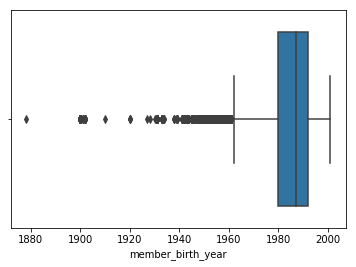

In [13]:
sb.boxplot(data=df, x='member_birth_year')

Nous constatons plusieurs valeurs aberrantes. Essayons de faire une filtre à cela et au lieu d'observer l'année de naissance des client, nous allons observer leur âge puisque c'est l'information qui nous interesse le plus. Nous allons donc construire une nouvelle colonne que nous allons nommer **age**

Text(0.5, 0, '')

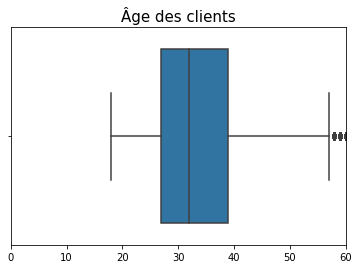

In [14]:
df["age"] = 2019 - df["member_birth_year"]
sb.boxplot(data=df, x='age')
plt.xlim((0,60));
plt.title("Âge des clients",size=15)
plt.xlabel("")

In [14]:
df["age"].describe().astype(int)

count    174952
mean         34
std          10
min          18
25%          27
50%          32
75%          39
max         141
Name: age, dtype: int32

#### Constats :
* En général, les clients sont agé de moins de 60 ans (plus précisément entre 18 ans et 57 ans).
* Une majorité des clients appartiennent à l'âge de la trentaine (entre 27 ans et 39 ans)

Allons maintenant observer la variable **member_gender**
#### Observation 2 : Genre des clients

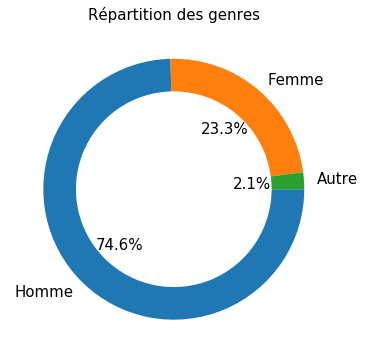

In [16]:
plt.figure(figsize = [6,6])
data = df['member_gender'].value_counts()

plt.pie(data, labels = ["Homme","Femme","Autre"], startangle = 0, counterclock = False, 
                            autopct="%.1f%%", wedgeprops = {'width' : 0.25})
 
plt.rcParams['font.size'] = 15
plt.title("Répartition des genres",size=15)
plt.show()

#### Constats :
* La majorité des clients sont des hommes.

Allons maintenant observer la variable **duration_sec**
#### Observation 3 : Distribution des durées d'utilisation des vélos

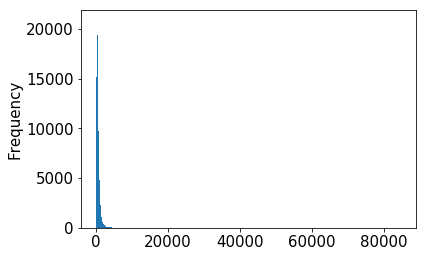

In [18]:
plt.figure(figsize = [6,4])
df['duration_sec'].plot(kind='hist',bins=1000)

#### Remarque : 
Nous voyons que la majorité des données se trouve au voisinage de 0. Nous pourrions améliorer notre observation par rapport à cette variable, en convertissant les unités de ces durées en minute au lieu de 60.

Text(0.5, 1.0, "Durée d'utilisation en minute")

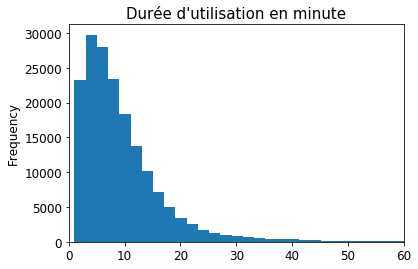

In [36]:
plt.figure(figsize = [6,4])
df['duration_min'] = df['duration_sec']//60
df['duration_min'].plot(kind='hist',bins=700)
plt.xlim((0,60))
plt.title("Durée d'utilisation en minute",size=15)

Text(0.5, 0, "Durée d'utilisation en minute")

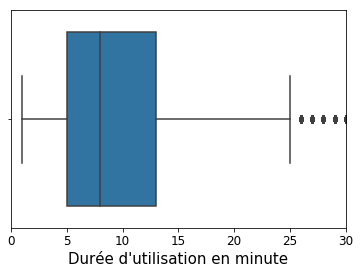

In [35]:
plt.figure(figsize = [6,4])
sb.boxplot(data=df, x='duration_min')
plt.xlim((0,30));
plt.xlabel("Durée d'utilisation en minute",size=15)


#### Constats :
* Ces graphiques nous montrent que l'ensemble des durées des trajets sont inférieures à 25 minutes.
* Plus de 75% des trajets sont inférieurs à 15 minutes.

Nous pouvons déduire que les stations de départ et d'arrivée ne sont pas très éloignées. Allons donc comparer la distribution des variables de localisation des stations de départ et d'arrivée : **start_station_latitude**,**end_station_latitude**,**start_station_longitude**,**end_station_longitude**
#### Observation 5 : Comparaison des distributions de la localisation des stations de départ et d'arrivée

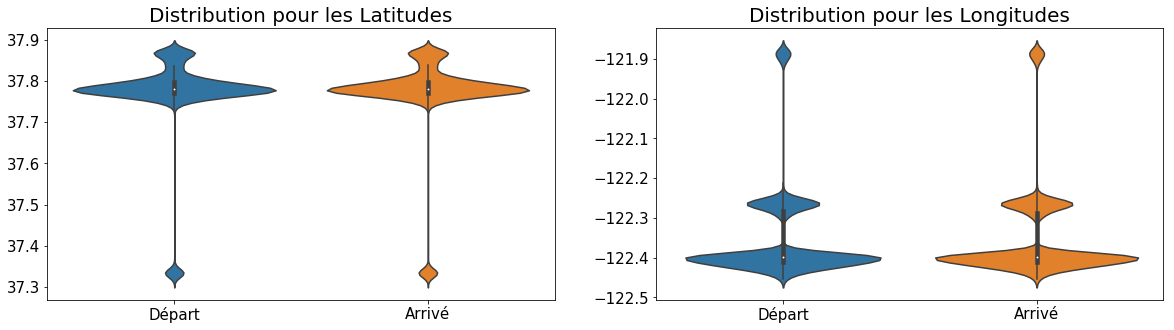

In [19]:
dataLat = df[['start_station_latitude','end_station_latitude']].rename(columns={
    'start_station_latitude':'Départ' , 'end_station_latitude':'Arrivé'})
dataLong = df[['start_station_longitude','end_station_longitude']].rename(columns={
    'start_station_longitude':'Départ' , 'end_station_longitude':'Arrivé'})

# DEUX GRAPHIQUES DANS UNE FIGURE
plt.figure(figsize = [20,5])

def Plot1(Data,Titre):
    sb.violinplot(data=Data)
    plt.title(Titre ,size = '20')
    plt.xticks(size=15)
    return None 

#Graphique de gauche : 
plt.subplot(1, 2, 1)
Plot1(dataLat,'Distribution pour les Latitudes')

#Graphique de droite : 
plt.subplot(1, 2, 2)
Plot1(dataLong,'Distribution pour les Longitudes')

#### Constats :
* Ces graphiques nous montrent que l'ensemble des stations de départ et d'arrivée de l'ensemble des trajets effectués par les clients ne s'éloignent pas trop des un des autres.
* Nous pouvons constater deux classes de zone où les traffics sont les plus fréquents et une troisième, toute petite.

Allons maintenant voir la distribution des clients selon leur type (abonnée ou pas) et en même temps nous allons observer aussi le type du velo (partagé ou pas)

#### Observation 6 : Distribution des types de client et le type de vélo (partagé ou pas)

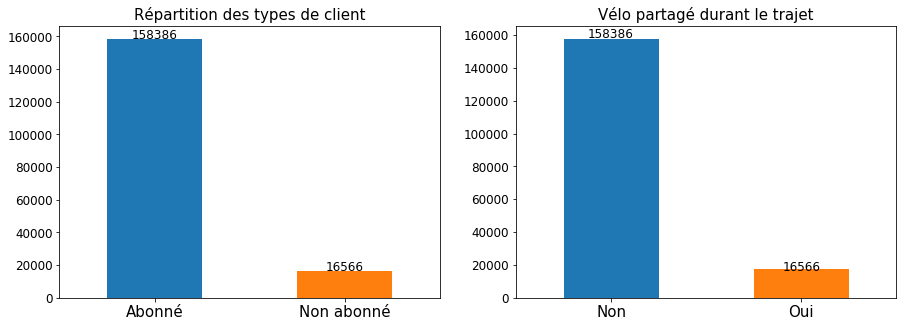

In [20]:
data1 = df['user_type'].value_counts()
data2 = df['bike_share_for_all_trip'].value_counts()

def Plot2(Data,Titre,Label):
    Data.plot(kind='bar')
    xindex = np.arange(len(data1))
    plt.xticks(xindex, labels = Label , size=15,rotation=0)
    plt.title(Titre,size=15)
    for i in range(len(Data)) :
        plt.text(i,data1[i],data1[i], ha="center")

    return None 

# DEUX GRAPHIQUES DANS UNE FIGURE
plt.figure(figsize = [15,5]) 
plt.rcParams['font.size'] = 12

#Graphique de gauche :
plt.subplot(1, 2, 1)
Plot2(data1,"Répartition des types de client",['Abonné', 'Non abonné'])

#Graphique de droite : 
plt.subplot(1, 2, 2)
Plot2(data2,"Vélo partagé durant le trajet",['Non', 'Oui'])

plt.show()

#### Constats :
* La majorité des clients sont des abonnés
* La majorité des utilisateurs n'ont pas utilisé de vélo partagé durant leur trajet.
* On peut déjà conjecturer que ces deux variables sont liés en voyant ces résultats.

### Discutez de la ou des distributions de vos variables d'intérêt. Y avait-il des points inhabituels ? Avez-vous eu besoin d'effectuer des transformations ?

J'ai remarqué plusieurs valeurs abérrantes avec la variable **member_birth_year** (des personnes nées dans les années 1880, alors que les données ont été collectées en 2019, ce qui fort probablement impossible). Je n'ai pas supprimé ces données mais j'ai décidé de limité les observations à partir d'un certain âge.

J'ai aussi remarqué plusieurs valeurs abérrantes avec la variable **duration_sec** (des durées pouvant aller à 80 000sec). Identiquement avec celui du précédent, je n'ai pas supprimé ces données mais baliser les observations avec cette variable.

### Parmi les fonctionnalités que vous avez étudiées, y avait-il des distributions inhabituelles ? Avez-vous effectué des opérations sur les données pour ranger, ajuster ou modifier la forme des données ? Si oui, pourquoi avez-vous fait cela ?

Avec la variable **member_birth_year**, j'ai décidé de créer une variable **age** qui représente l'age des clients en 2019; puisque cette information est plus utile que l'année de naissance.

J'ai décidé de créer autre variable **duration_min** qui est une conversion de la variable **duration_sec** en minute, puisque lire les duréer en minute serait plus intuitif pour les analyses.

## Exploration bivariée

Commençons cette exploration bivarié avec les paires des variables numériques


#### Observation 7 : Correlation entre les variables numériques

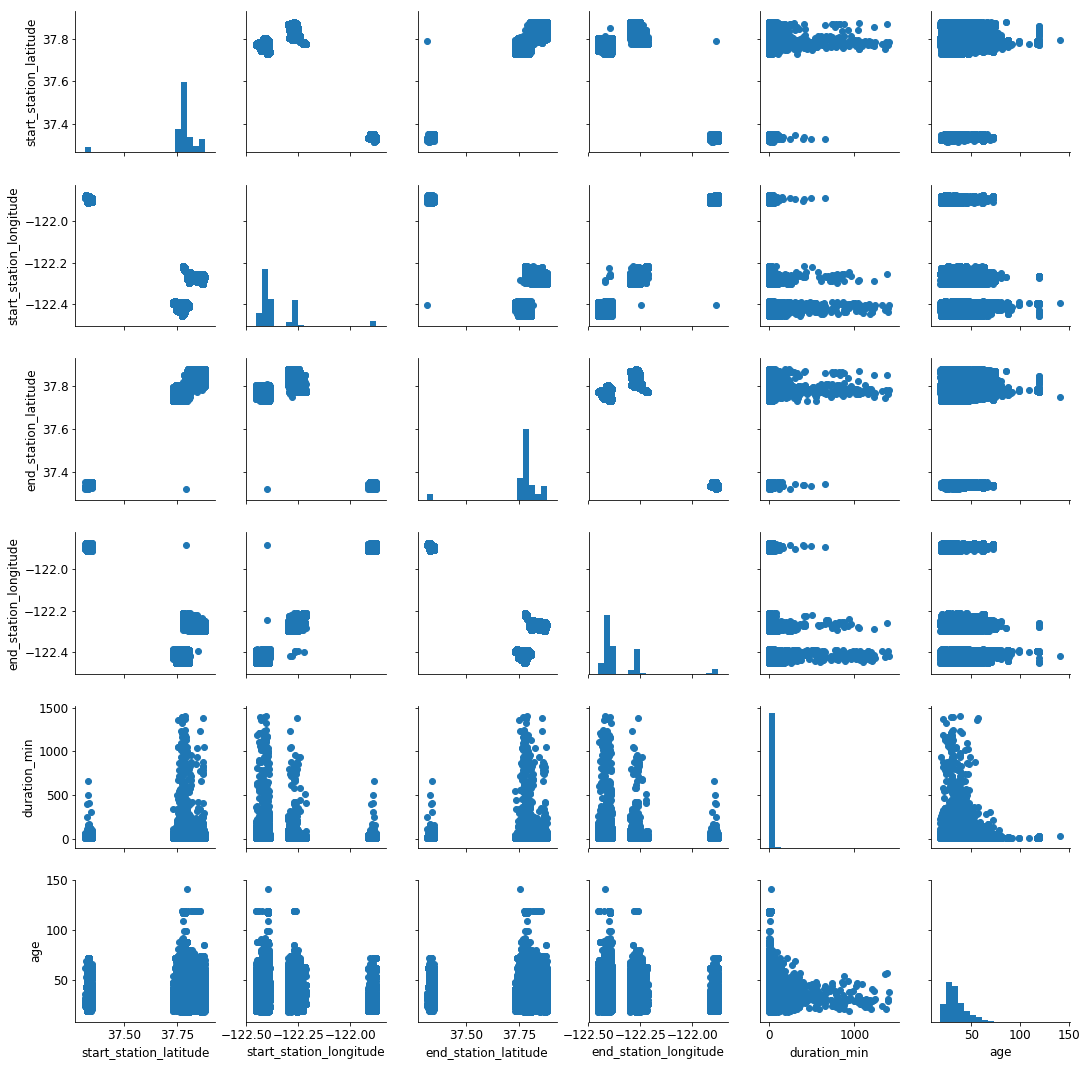

In [24]:
Numerique_var = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude',
                 'duration_min', 'age']

g = sb.PairGrid(data = df, vars = Numerique_var)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)

#### Commentaire :
* Avec ces graphiques, il est encore très difficile de conclure, voire observer quoi que ce soit
* Nous allons dresser la matrice des correlations de ces variables.

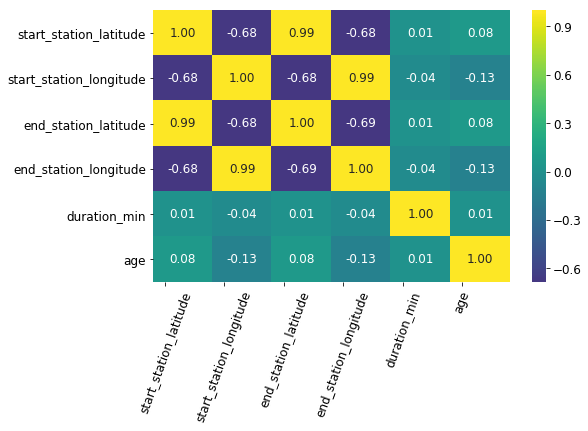

In [25]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[Numerique_var].corr(), annot = True, fmt = '.2f', cmap = 'viridis', center = 0)
locations = np.arange(6) + 0.2
plt.xticks(locations,rotation=70)
plt.show()

#### Constats :
* Les variables **start_station_latitude** et **end_station_latitude** ainsi que **start_station_longitude** et **end_station_longitude** ont une forte correlation positive.

* Nous pouvons en déduire les stations de départ se trouve généralement près des stations d'arrivé.

Allons donc observer les relations entre les coordonnées géographique des stations de départ et d'arrivée

#### Observation 8 : Relation entre les coordonnées géographique des stations de départ et d'arrivée

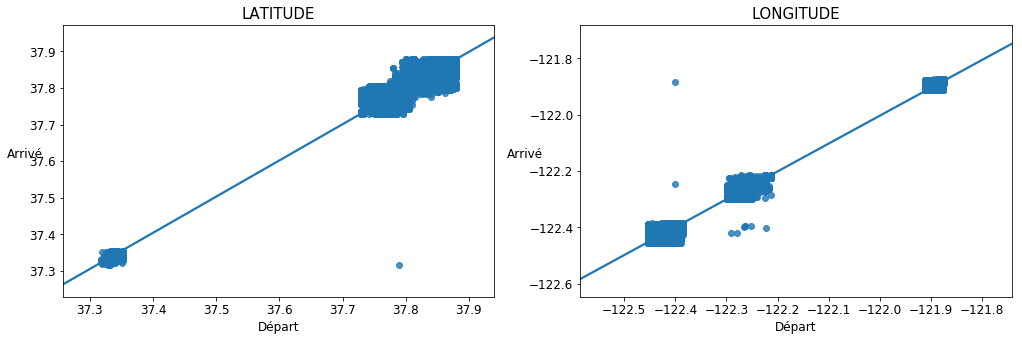

In [21]:
# DEUX GRAPHIQUES DANS UNE FIGURE
plt.figure(figsize = [17,5]) 
plt.rcParams['font.size'] = 12

def Plot3(Data,Titre,var1,var2):
    sb.regplot(data=Data, x=var1,y=var2,fit_reg=True)
    plt.title(Titre,size=15)
    plt.xlabel("Départ",size=12)
    plt.ylabel("Arrivé",size=12,rotation=0)
    return None 

#Graphique de gauche :
plt.subplot(1, 2, 1)
Plot3(df,"LATITUDE",'start_station_latitude','end_station_latitude')

#Graphique de droite : 
plt.subplot(1, 2, 2)
Plot3(df,"LONGITUDE",'start_station_longitude','end_station_longitude')

plt.show()

#### Constats :
* Nous pouvons observer la forte correlation entre les variables.

* Nous pouvons aussi remarquer qu'il existe 3 zones dont les stations de départ et d'arrivée sont regroupées.

Allons maintenant observer les relations avec les variables qualitatives

#### Observation 10 : Relation entre l'âge des clients et le type de forfait qu'ils ont choisi (Abonné ou Non)

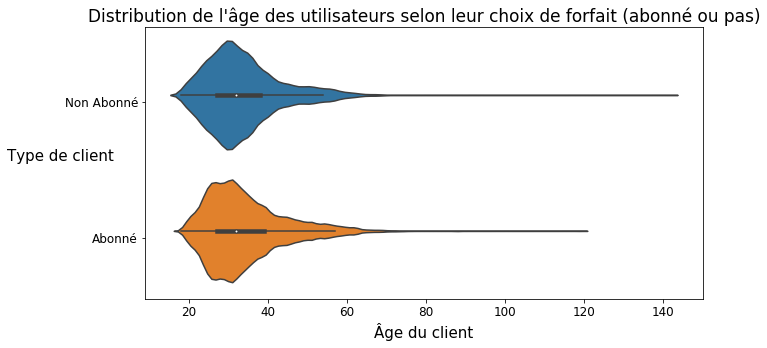

In [27]:
plt.figure(figsize = [10,5]) 
sb.violinplot(data=df,x='age',y='user_type')

#Titre
plt.title("Distribution de l'âge des utilisateurs selon leur choix de forfait (abonné ou pas)",size=17)

#Abscisse
plt.xlabel('Âge du client',size=15)

#Ordonnée
locations = np.arange(2)  + 0.10 / 2
labels = ['Non Abonné', 'Abonné']
plt.yticks(locations, labels)
plt.ylabel('Type de client',rotation=0,size=15)

plt.show()

#### Constats :
* Il n'y a pas trop de différence entre la distribution des âges des clients même si leur type de forfait sont différent. Il n'y a donc pas trop de relation entre ces variables, a priori.


#### Observation 11 : Relation entre la durée d'utilisation des utilisateurs et le type de forfait qu'ils ont choisi (Abonné ou Non)

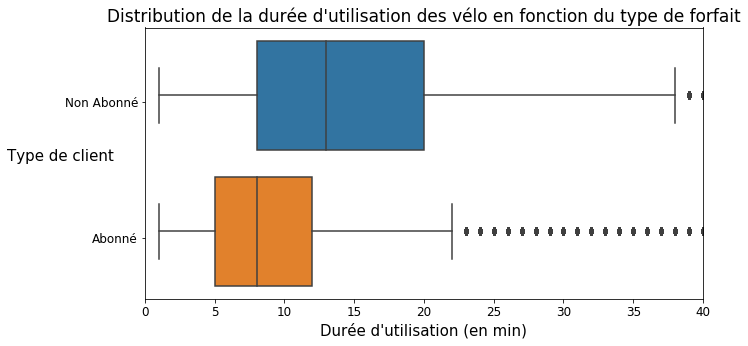

In [28]:
plt.figure(figsize = [10,5]) 
sb.boxplot(data=df,x='duration_min',y='user_type')

#Titre
plt.title("Distribution de la durée d'utilisation des vélo en fonction du type de forfait",size=17)

#Abscisse
plt.xlabel("Durée d'utilisation (en min)",size=15)
plt.xlim(0,40)

#Ordonnée
locations = np.arange(2)  + 0.10 / 2
labels = ['Non Abonné', 'Abonné']
plt.yticks(locations, labels)
plt.ylabel('Type de client',rotation=0,size=15)

plt.show()

#### Constats :
* On remarque une grande différence entre les la distribution des durées d'utilisation des abonnées et ceux des non abonnées.

* Les abonnées ont majoritairement une durée d'utilisation plus courte que celles des non abonnées.



#### Observation 12 : Relation entre l'âge des clients et le type de vélo utilisé (Partagé ou non)

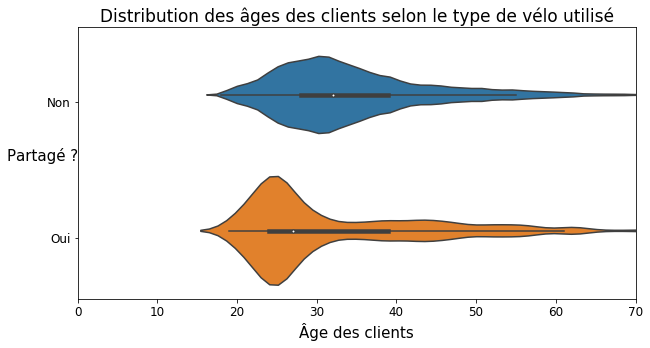

In [29]:
plt.figure(figsize = [10,5]) 
sb.violinplot(data=df,x='age',y='bike_share_for_all_trip')

#Titre
plt.title('Distribution des âges des clients selon le type de vélo utilisé',size=17)

#Abscisse
plt.xlabel('Âge des clients',size=15)
plt.xlim(0,70)

#Ordonnée
locations = np.arange(2)  + 0.10 / 2
labels = ['Non', 'Oui']
plt.yticks(locations, labels)
plt.ylabel('Partagé ?',rotation=0,size=15)

plt.show()

#### Constats :
* Nous constatons une concentration de client plus jeune (dans la vingtaine) utilisant les vélos partagés.


#### Observation 13 : Relation entre la durée d'utilisation par utilisateurs et le type de vélo utilisé (Partagé ou non)

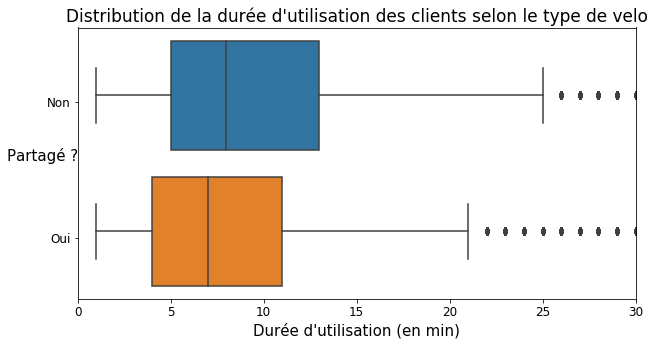

In [30]:
plt.figure(figsize = [10,5]) 
sb.boxplot(data=df,x='duration_min',y='bike_share_for_all_trip')

#Titre
plt.title("Distribution de la durée d'utilisation des clients selon le type de velo",size=17)

#Abscisse
plt.xlabel("Durée d'utilisation (en min)",size=15)
plt.xlim(0,30)

#Ordonnée
locations = np.arange(2)  + 0.10 / 2
labels = ['Non', 'Oui']
plt.yticks(locations, labels)
plt.ylabel('Partagé ?',rotation=0,size=15)

plt.show()

#### Constats :
* Nous constatons une légère différence entre la distribution des durées d'utilisation des vélos pour les clients utilsant des vélos partagés et d'autres non.

Il serait interressant de voir la relation entre les variables **bike_share_for_all_trip** et **user_type** puisqu'elles ont modifié la distribution des clients selon deux variables : age et durée d'utilisation du vélo.

#### Observation 14 : Relation entre le type de forfait choisi par le client (Abonné ou non) et le type de vélo utilisé (Partagé ou non)

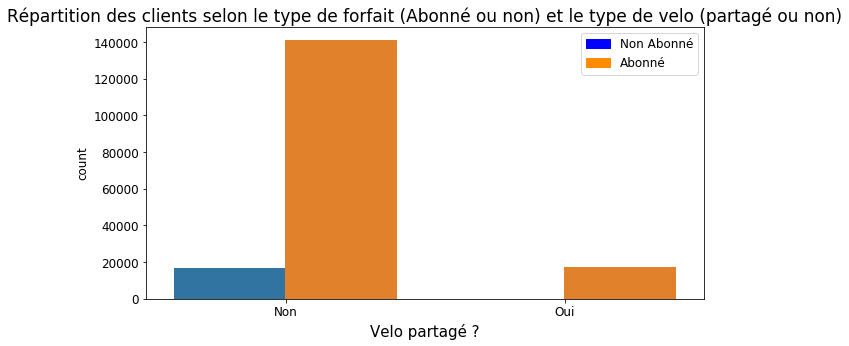

In [31]:
plt.figure(figsize = [10,5]) 
sb.countplot(data=df,x='bike_share_for_all_trip',hue='user_type')
sb.color_palette('bright')
#Titre
plt.title('Répartition des clients selon le type de forfait (Abonné ou non) et le type de velo (partagé ou non)',size=17)

#LEGENDE
NonAbonne = mpatches.Patch(color='blue', label='Non Abonné')
Abonne = mpatches.Patch(color='darkorange', label='Abonné')
plt.legend(handles=[NonAbonne, Abonne])

#Abscisse
locations = np.arange(2)  + 0.01 / 10
labels = ['Non', 'Oui']
plt.xticks(locations, labels)
plt.xlabel("Velo partagé ?",size=15)

plt.show()

#### Constats :
* Nous constatons que seul les abonnées utilisent les vélos partagés.

Nous remarquons le type de forfait utilisé et le type de vélo par le client présente des relations très intéressante avec les autres variables, encore plus entre eux.


Allons maintenant observer les relations avec la variables **member_gender**.

#### Observation 15 : Relation entre le genre des clients et leur âge

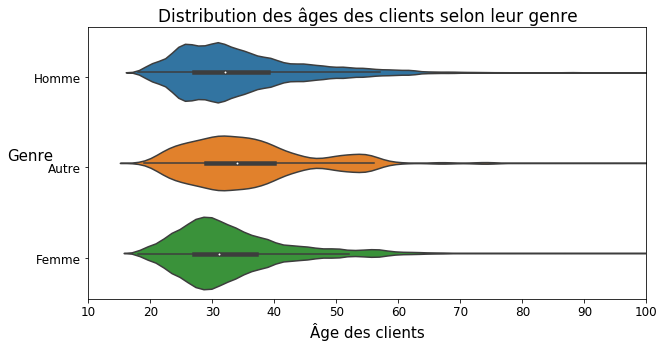

In [32]:
plt.figure(figsize = [10,5]) 
sb.violinplot(data=df,x='age',y='member_gender')

#Titre
plt.title('Distribution des âges des clients selon leur genre',size=17)

#Abscisse
plt.xlabel('Âge des clients',size=15)
plt.xlim(10,100)

#Ordonnée
locations = np.arange(3)  + 0.10 / 2
labels = ['Homme', 'Autre', 'Femme']
plt.yticks(locations, labels)
plt.ylabel('Genre',rotation=0,size=15)

plt.show()

#### Constats :
* Nous constatons que les femmes sont légèrement plus jeune que les autres dans l'ensemble.
* La différence des distribution n'est pas réellement flagrante pour les 3 genres.

#### Observation 16 : Relation la durée d'utilisation des vélos et le genre des clients

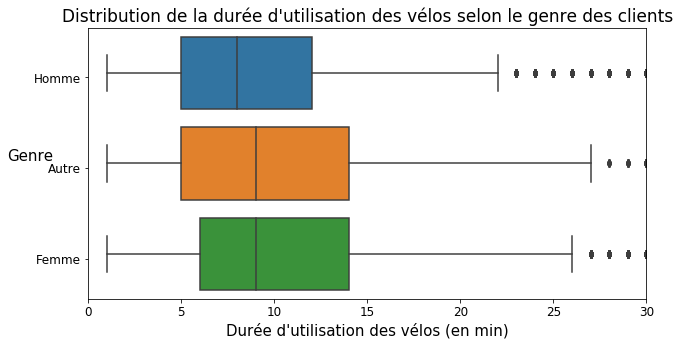

In [33]:
plt.figure(figsize = [10,5]) 
sb.boxplot(data=df,x='duration_min',y='member_gender')
plt.xlim(0,30)

#Titre
plt.title("Distribution de la durée d'utilisation des vélos selon le genre des clients",size=17)

#Abscisse
plt.xlabel("Durée d'utilisation des vélos (en min)",size=15)
plt.xlim(0,30)

#Ordonnée
locations = np.arange(3)  + 0.10 / 2
labels = ['Homme', 'Autre', 'Femme']
plt.yticks(locations, labels)
plt.ylabel('Genre',rotation=0,size=15)

plt.show()

#### Constats :
* Les hommes ont légèrement tendance à utiliser moins que les autres genres.
* Les trans et les femmes ont presque le même comportement concernant le temps d'utilisation des vélos.


#### Observation 17 : Répartition des types de clients (Abonné ou Non) selon leur genre

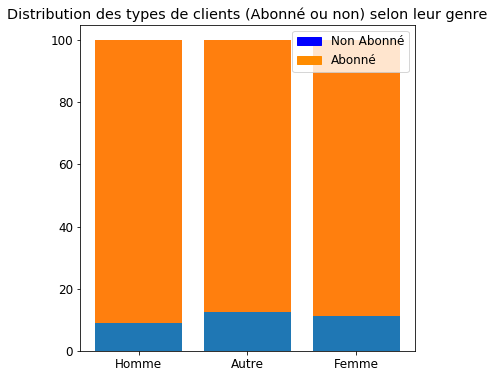

In [38]:
#Chargement des datas
Genre=df.groupby("member_gender").count()['index']
Genre_type=df.groupby(['member_gender','user_type']).count()['index']

Non_abonne = [Genre_type['Male'][0]*100/Genre[1], Genre_type['Other'][0]*100/Genre[2], 
                  Genre_type['Female'][0]*100/Genre[0]]
Abonne     = [Genre_type['Male'][1]*100/Genre[1], Genre_type['Other'][1]*100/Genre[2],
                  Genre_type['Female'][1]*100/Genre[0]]
#Graphe
Genre_Label = ["Homme", "Autre", "Femme"]
plt.bar(Genre_Label, Non_abonne)
plt.bar(Genre_Label, Abonne, bottom = Non_abonne)

#LEGENDE
plt.legend(handles=[mpatches.Patch(color='blue', label='Non Abonné'), 
                    mpatches.Patch(color='darkorange', label='Abonné')])
#Titre
plt.title('Distribution des types de clients (Abonné ou non) selon leur genre')
plt.show()

#### Constats :
* Les distributions sont à peu près identique pour les 3 genres.


#### Observation 18 : Répartition des types de vélo utilisé (Partagé ou Non) selon le genre des clients

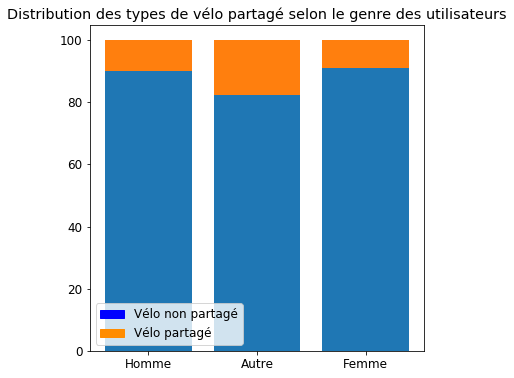

In [39]:
#Chargement des datas
Genre=df.groupby("member_gender").count()['index']
Genre_share=df.groupby(['member_gender','bike_share_for_all_trip']).count()['index']

No_share = [Genre_share['Male'][0]*100/Genre[1], Genre_share['Other'][0]*100/Genre[2],
            Genre_share['Female'][0]*100/Genre[0]]
Share    = [Genre_share['Male'][1]*100/Genre[1], Genre_share['Other'][1]*100/Genre[2],
            Genre_share['Female'][1]*100/Genre[0]]

#Graphe
Genre_Label = ["Homme", "Autre", "Femme"]

plt.bar(Genre_Label, No_share)
plt.bar(Genre_Label, Share, bottom = No_share)

#LEGENDE
plt.legend(handles=[mpatches.Patch(color='blue', label='Vélo non partagé'), 
                    mpatches.Patch(color='darkorange', label='Vélo partagé')],loc=3)
#Titre
plt.title('Distribution des types de vélo partagé selon le genre des utilisateurs')
plt.show()

#### Constats :
* Les distributions sont toutes à peu près identique pour les hommes et les femmes.

* Une légère différence de proportion se présente pour les trans.

Néanmoins, le genre des clients ne présente pas vraiment de relation intéressante avec les autres variables.

### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Comment la ou les caractéristiques d'intérêt ont-elles varié avec d'autres caractéristiques de l'ensemble de données ?

Nous avons pu observer que les stations de départ et d'arrivé ne se sont pas très éloigné des un des autres. Nous avons aussi trouver 3 zones où les clients prennent et rapportent les vélos.

Nous avons également remarqué une différence de comportement des clients selon le type de vélo qu'ils utilisent (partagé ou non) ainsi que le type de forfait qu'ils se sont souscrit (Abonné ou non). 
* Les abonnées ont tendance à utiliser les vélos avec une durée généralement moins que ceux qui ne le sont pas.
* Les abonnées ont tendance à utiliser des vélos partagé que ceux qui ne le sont pas.

Nous avons pas repérer de relation concluante avec le genre des clients et d'autres variables. 

### Avez-vous observé des relations intéressantes entre les autres caractéristiques (pas la ou les principales caractéristiques d'intérêt) ?

Une relation très intéressante a été constaté : Tous les non abonnés n'ont pas utilisé de vélo partagé. Donc les variables **bike_share_for_all_trip** et **user_type** sont très liées.

## Exploration multivariée

Après nos analyses précédentes, nous avons pu trouver deux variables fortement liées : **bike_share_for_all_trip** et **user_type**. 
Nous avions déjà observer que ces deux variables n'ont pas montré de relation avec la variables **member_gender**. Nous avions aussi constater que les deux variables **age** et **duration_min** ne sont pas du tout correlés.

Donc il nous reste 2 observations multivarié interessantes à exploiter :
* Les variables : **bike_share_for_all_trip** et **user_type** et **age**
* Les variables : **bike_share_for_all_trip** et **user_type** et **duration_min**


#### Observation 19 : Distribution des âge des clients selon leur choix de partage de velo ainsi que leur type de forfait

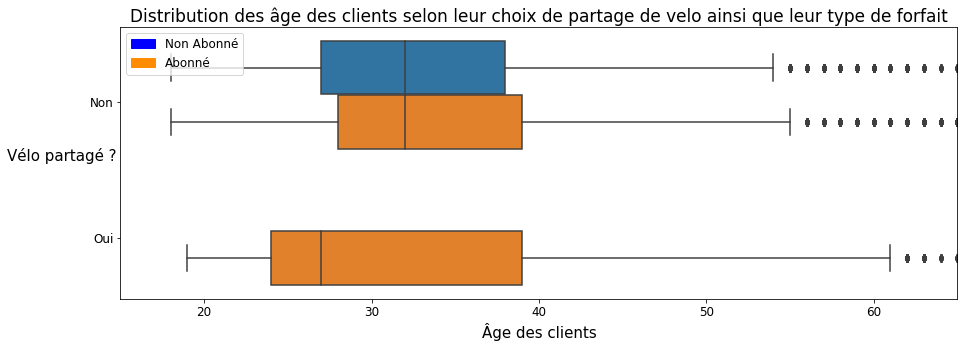

In [43]:
plt.figure(figsize = [15,5]) 
sb.boxplot(data=df, x='age', y='bike_share_for_all_trip', hue = 'user_type')
sb.color_palette('bright')

#LEGENDE
NonAbonne = mpatches.Patch(color='blue', label='Non Abonné')
Abonne = mpatches.Patch(color='darkorange', label='Abonné')
plt.legend(handles=[NonAbonne, Abonne],loc=2)

#Titre
plt.title('Distribution des âge des clients selon leur choix de partage de velo ainsi que leur type de forfait'
          ,size=17)

#Abscisse
plt.xlabel('Âge des clients',size=15)
plt.xlim(15,65)

#Ordonnée
locations = np.arange(2)  + 0.10 / 2
labels = ['Non', 'Oui']
plt.yticks(locations, labels)
plt.ylabel('Vélo partagé ?          ',
           rotation=0,size=15)

plt.show()

#### Constats :
* La distributions des âges des clients utilisant des vélos non partagé sont à peu près identique, qu'ils soient abonnés ou non 


* Comme vu précédémment, seuls les abonnés utilisent les vélos partagés. Et nous observons que la répartition des âges est très dispersé par rapport à ceux qui utilisent des vélos non partagés. Nous remarquons également aussi qu'une majorité des clients abonnées utilisant des vélos partagés, sont majoritairement jeunes (dans les vingtaines, comme mentionné précédemment).


#### Observation 20 : Distribution de la durée des trajets des clients selon leur choix de partage et le type de forfait

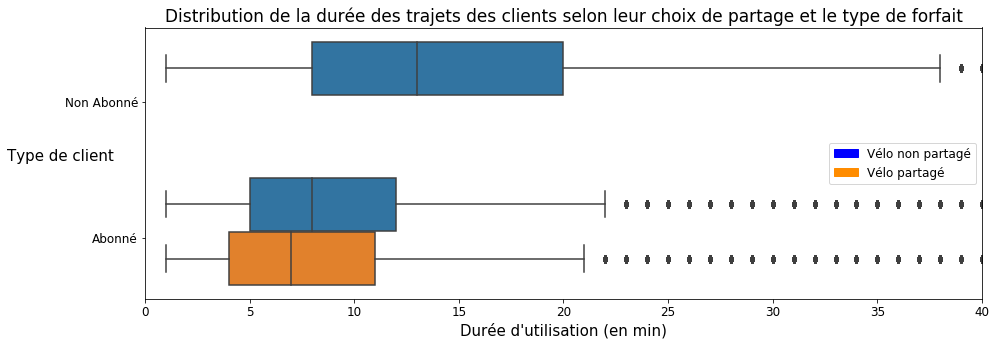

In [44]:
plt.figure(figsize = [15,5]) 
sb.boxplot(data=df, x='duration_min', y='user_type', hue = 'bike_share_for_all_trip')
sb.color_palette('bright')

#LEGENDE
Not_sharing = mpatches.Patch(color='blue', label='Vélo non partagé')
Sharing = mpatches.Patch(color='darkorange', label='Vélo partagé')
plt.legend(handles=[Not_sharing, Sharing],loc=5)

plt.xlim(0,40)

#Titre
plt.title('Distribution de la durée des trajets des clients selon leur choix de partage et le type de forfait',size=17)

#Abscisse
plt.xlabel("Durée d'utilisation (en min)",size=15)
plt.xlim(0,40)

#Ordonnée
locations = np.arange(2)  + 0.10 / 2
labels = ['Non Abonné', 'Abonné']
plt.yticks(locations, labels)
plt.ylabel('Type de client',rotation=0,size=15)

plt.show()

#### Constats :
* La distribution des durées d'utilisation des vélos est identique pour les abonnées, quelque soit la le type du vélo (partagé ou non).


* Nous remarquons également que les vélo non partagé sont généralement utilisés plus longuement que les vélos non partagé.


* Un différence flagrante se présente présente pour les non abonnés : ils n'utilisent que des vélos non partagé et leur utilisation sont généralement longue que pour les abonnés

### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Y a-t-il eu des fonctionnalités qui se sont renforcées en termes d'examen de vos fonctionnalités d'intérêt ?

Ces deux graphiques nous ont montré à quel point les deux variables **bike_share_for_all_trip** et **user_type** sont très liées puisqu'elles ont pu mettre en valeur les différents comportement des clients selon leur valeur. Une légère variation a pu être observer selon l'âge des clients. Mais une différence fondamental a pu être observer avec la durée d'utilisation des vélos par les clients. Les non abonnées n'utilisent que des vélos non partagés et ont tendances les utilisé plus longtemps que les abonnées.

### Y a-t-il eu des interactions intéressantes ou surprenantes entre les fonctionnalités ?

Les clients Non abonnées utilisent tous des vélos non partagés et ont un temps d'utilisation largement supérieur (pouvont aller plus de 30 minutes) à l'ensemble des données (la majorité inférieure à 30% d'après le graphique vu au début).

Nous pouvons donc conclure que le choix de forfait modifie le type de vélo choisi par les clients ainsi que le temps qu'ils utilisent les vélos. 